# Handwritten Digit Recognition on MNIST dataset

In [85]:
# import all libreries
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml

### 1. <u>DATA OBSERVATION AND ANALYSIS</u>

In [86]:
# Load dataset
mnist = fetch_openml("mnist_784", as_frame=False)

C:\Users\rakib\AppData\Roaming\Python\Python311\site-packages\sklearn\datasets\_openml.py:932: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [87]:
mnist_data = pd.DataFrame(mnist.data)
mnist_data.head()

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])
Actual digit in target is : 2


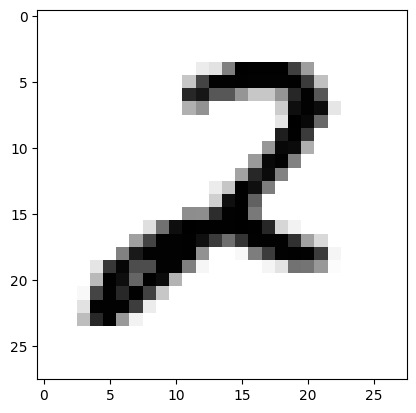

In [91]:
# print(mnist)
X, Y = mnist['data'], mnist['target']
# print(X.shape)
# print(Y.shape)
digit = X[36001] # Grayscale RGB codes are 0 to 255 so, here, values are 0 to 255, and in image you can see 0 = white and other value = not white 
# print(digit)
# print(Y[0])
print(mnist.keys())
digit_image = digit.reshape(28, 28)
plt.imshow(digit_image, cmap=matplotlib.cm.binary, interpolation='nearest')
print(f"Actual digit in target is : {Y[36001]}")


### 2. <u>DATA SPLITTING FOR TRAIN AND TEST</u>

In [ ]:
x_train, x_test, y_train, y_test = X[:60000], X[60000:], Y[:60000], Y[60000:]
print(f"X train shape = {x_train.shape}   |   X test shape = {x_test.shape}")
print(f"Y train shape = {y_train.shape}   |   Y test shape = {y_test.shape}")

X train shape = (60000, 784)   |   X test shape = (10000, 784)
Y train shape = (60000,)   |   Y test shape = (10000,)


### 3. <u>SHUFFLE DATASET</u>

In [94]:
shuffle_index = np.random.permutation(60000)
x_train, y_train = x_train.iloc[shuffle_index], y_train.iloc[shuffle_index]

### 4. <u>APPLY CALSSIFIER</u>

In [95]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(x_train, y_train)
clf.score(x_test, y_test)


C:\Users\rakib\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9255

### 5. TEST DATA

In [98]:
number = 235
# print(f"Predicted value is : {clf.predict(X.to_numpy[253])}")
print(f"Actual value is : {Y[number]}")
clf.predict(X[[number]])

Actual value is : 3


C:\Users\rakib\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array(['3'], dtype=object)